# **Tital: Diamond Price Prediction**
By: HILAL ALJULANDANI

# **Project objective:** The aim is to build a model to predict the price of diamonds


# **Step1:** Importing Libraries

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
import plotly.express as px
import os


# **Step2:** Loading Data


This dataset contains the prices and other attributes of almost 54,000 diamonds. There are 11 attributes included in the dataset including the target ie. price.

Feature description:

price price in US dollars ($326--$18,823)This is the target column containing tags for the features.

The 4 Cs of Diamonds:-

carat (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs.

cut (Fair, Good, Very Good, Premium, Ideal) In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.  

color, from J (worst) to D (best) The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.  

clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.  

Dimensions

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79) The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface).

table width of the top of the diamond relative to widest point (43--95)
A diamond's table refers to the flat facet of the diamond seen when the stone is face up. The main purpose of a diamond table is to refract entering light rays and allow reflected light rays from within the diamond to meet the observer’s eye. The ideal table cut diamond will give the diamond stunning fire and brilliance.



In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# **Step3:** EDA (Exploratory Data Analysis)

Steps involved:

Descriptive exploration

data pre-processing

Data cleaning and Identifying and removing outliers

Encoding and data transformation

In [ ]:
df.shape

(53940, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Note: column name Unnamed:0 is not a valid columns. so, we will drop the column name Unnamed:0

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Note: There are 53940 non-null values in all the attributes thus no missing values.
Datatype of features 'cut', 'color' & 'clarity' is "object" which needs to be converted into numerical variable (will be done in data preprocessing) before we feed the data to algorithms.

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Note: Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.

In [ ]:
df=df[df['x']!=0]
df=df[df['y']!=0]
df=df[df['z']!=0]
df.shape

(53920, 10)

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Text(0.5, 1.0, 'Theme for EDA')

<Figure size 640x480 with 0 Axes>

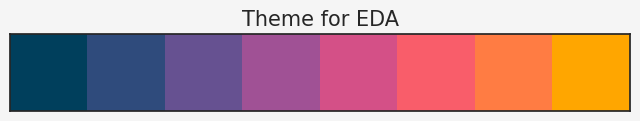

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
colors=['#003f5c','#2f4b7c','#665191','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600']
sns.set(palette=colors, font=(), style='white', rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})
sns.despine(left=False, right=False)
sns.palplot(colors)
plt.title("Theme for EDA", family=(), size=15, weight=50)

Target variable is "price" so let us check the relationship with price with other variables.

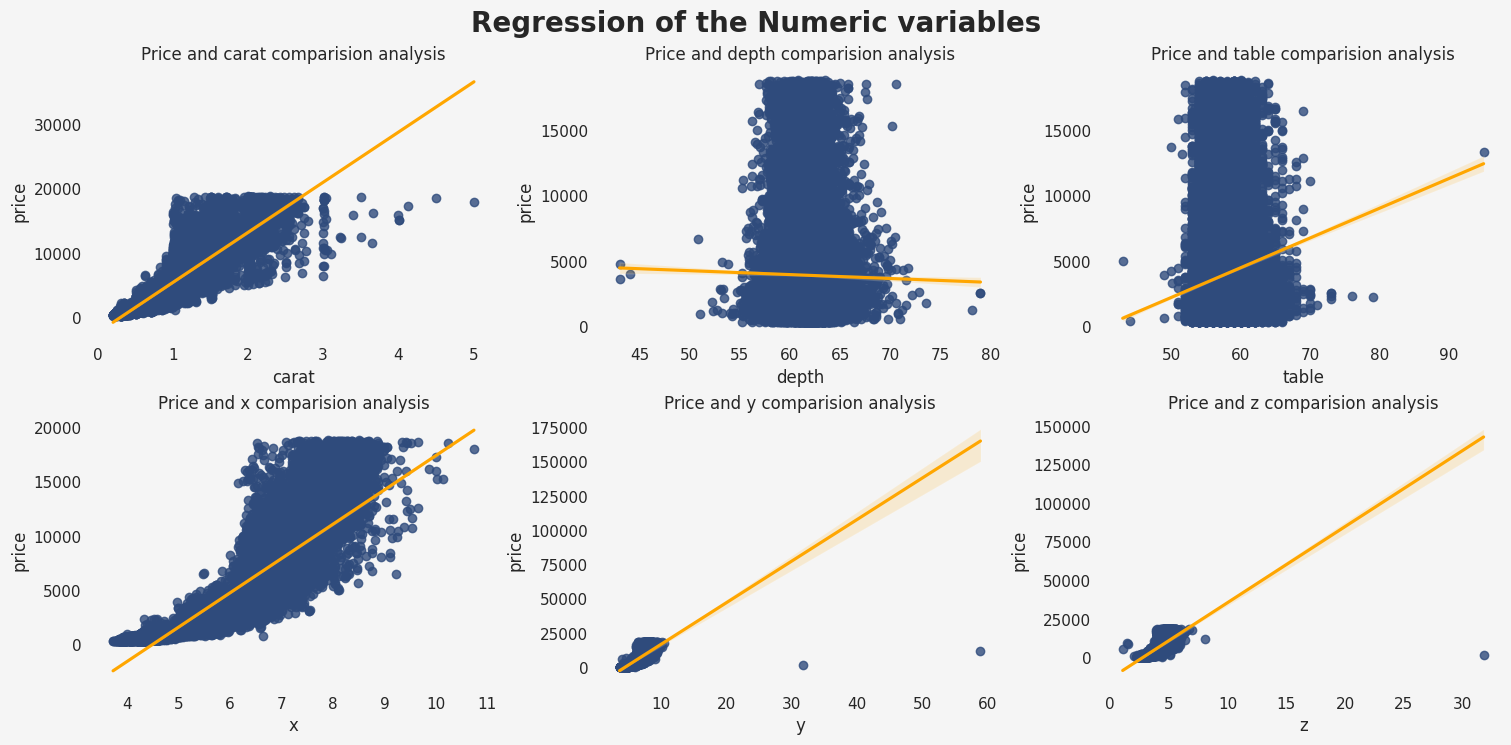

In [ ]:
int_cols = df.select_dtypes(exclude='object').columns.to_list()
#print(int_cols)
int_cols.remove('price')
j=0
fig=plt.figure(figsize=(15,10), constrained_layout =True)
plt.suptitle("Regression of the Numeric variables", family=(), size=20, weight='bold')
for i in int_cols:
    ax=plt.subplot(331+j)
    #ax.set_title('Title')
    #print(df[i])
    ax=sns.regplot(data=df, x=i, y='price', color=colors[1], line_kws={'color':'#ffa600'})
    ax.set_title("Price and {} comparision analysis".format(i), family=())
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)

    j=j+1

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['carat'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9215920634723974  with a P-value of P = 0.0


In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['depth'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.010728922064308654  with a P-value of P = 0.012726132305376265


In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['table'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.12724530491450478  with a P-value of P = 2.035104918903821e-193


In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['x'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.887231372527643  with a P-value of P = 0.0


In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['y'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.867864244674355  with a P-value of P = 0.0


In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['z'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8682064012988696  with a P-value of P = 0.0


Above chart shows the linear relationship with the Target variable. And Pearson corr coeff is obtained along with a p-value, however,there are relationship between Target variable (price) and all the numerical features except the table feature. Moreover, there are outliers need to be removed to get better results.

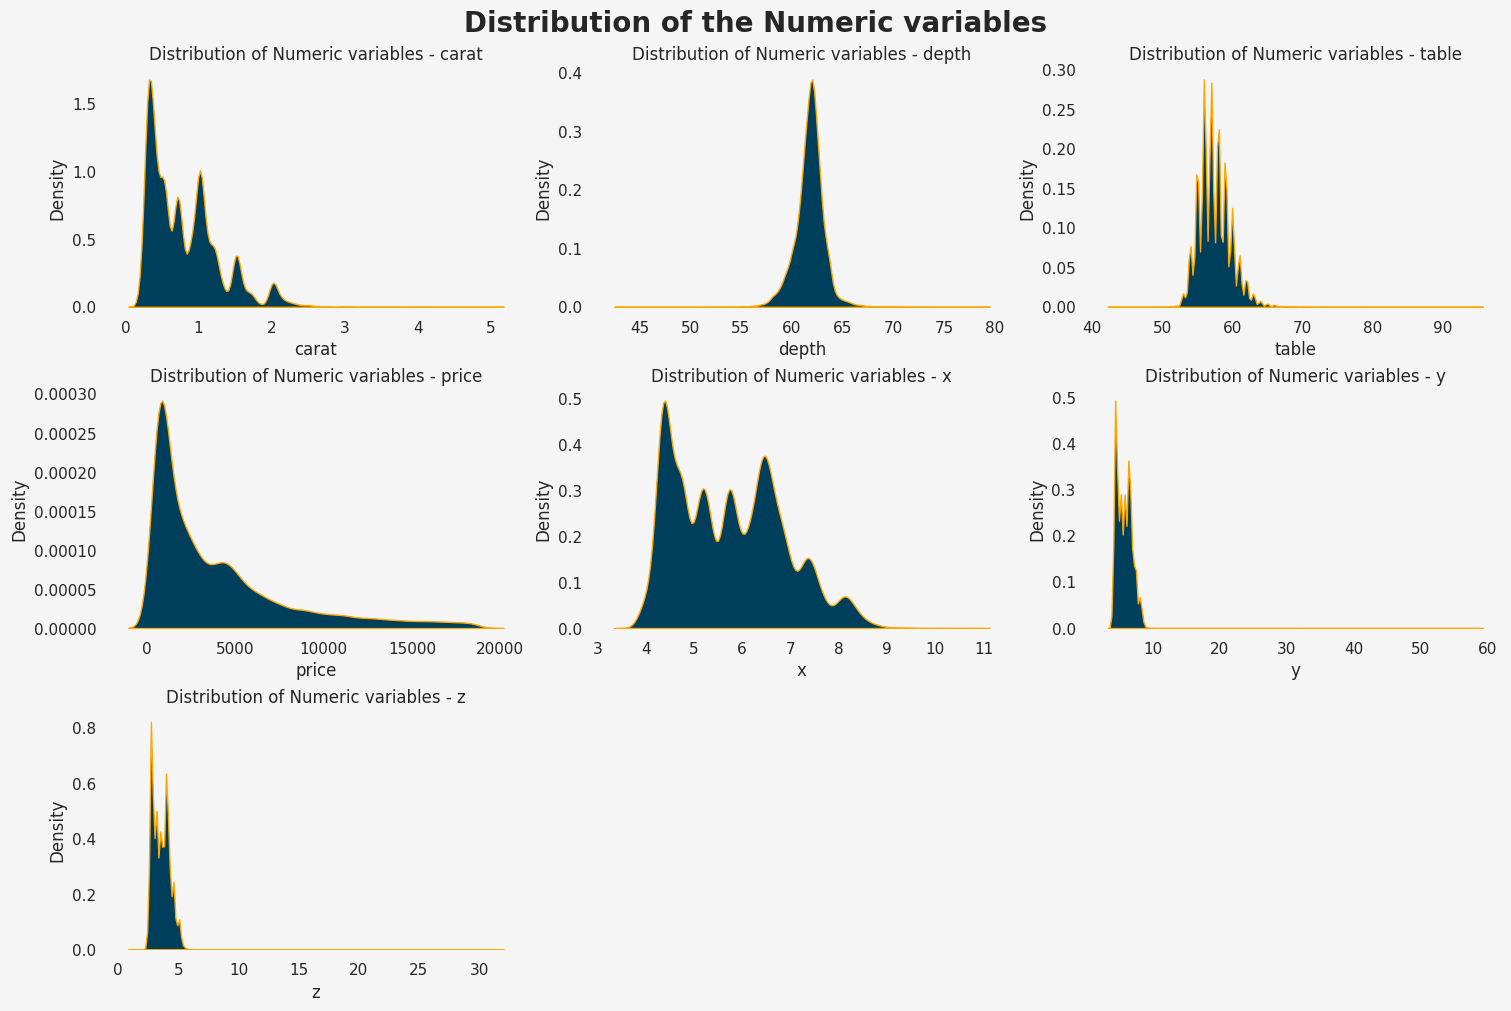

In [ ]:
# let us find the distribution of integer variables
int_cols = df.select_dtypes(exclude='object').columns.to_list()
j=0
fig=plt.figure(figsize=(15,10), constrained_layout =True)
plt.suptitle("Distribution of the Numeric variables", family=(), size=20, weight='bold')
for i in int_cols:
    ax=plt.subplot(331+j)
    #ax.set_title('Title')
    #print(df[i])
    ax=sns.kdeplot(data=df, x=i, color=colors[0], fill=True, edgecolor=colors[-1], alpha=1)
    ax.set_title("Distribution of Numeric variables - {}".format(i), family=())
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)

    j=j+1

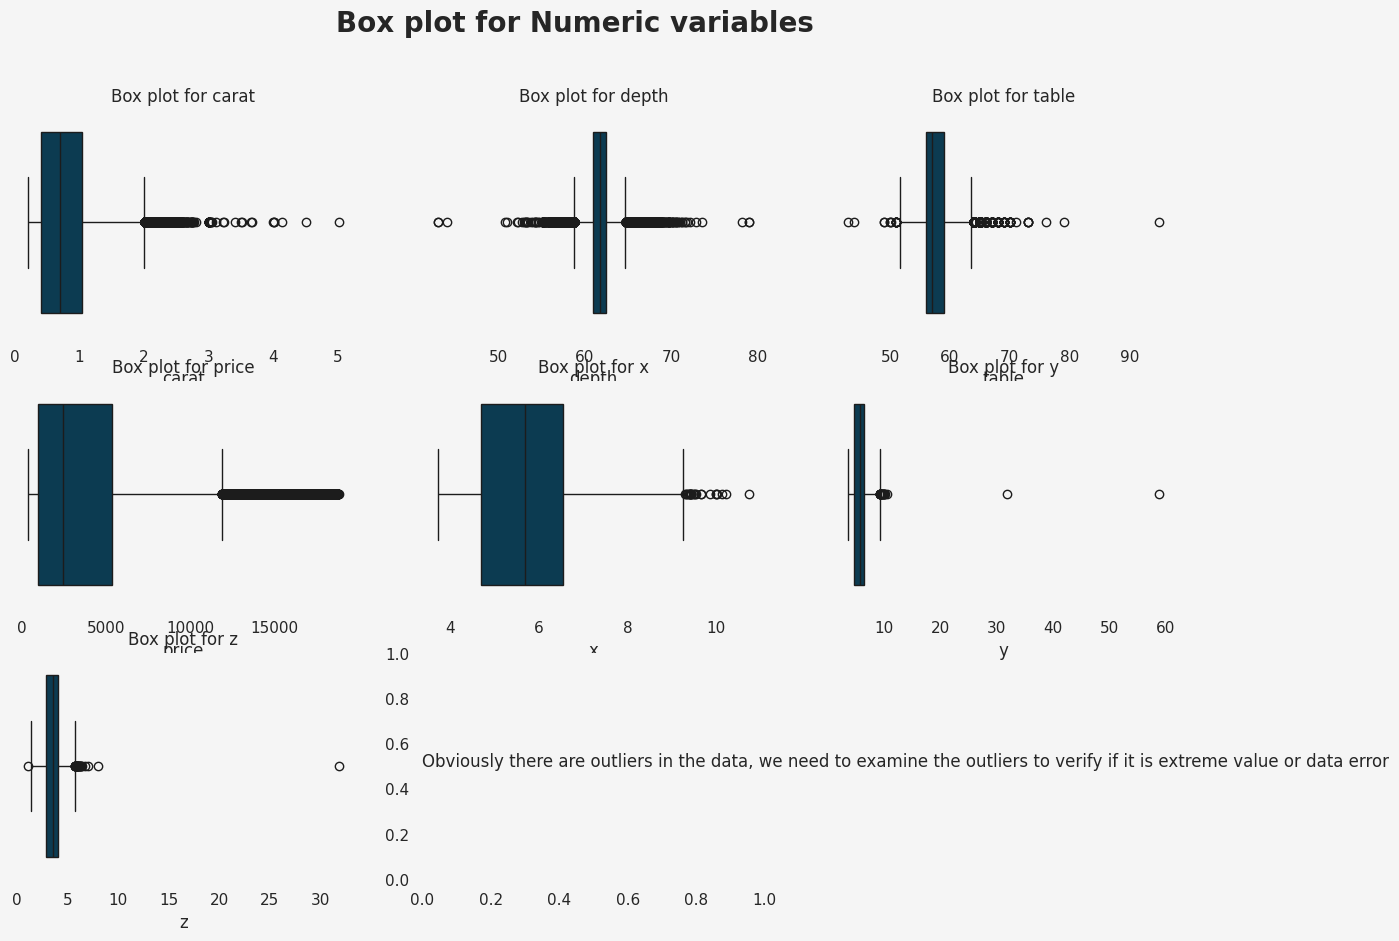

In [ ]:
j=0
fig=plt.figure(figsize=(15,10))
plt.suptitle("Box plot for Numeric variables", family=(), size=20, weight='bold')
for i in int_cols:
    ax=plt.subplot(331+j)
    #ax.set_title('Title')
    #print(df[i])
    ax=sns.boxplot(data=df, x=i,color=colors[0])
    ax.set_title("Box plot for {}".format(i))
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1
ax=plt.subplot(331+j)
ax.text(x=0,y=0.5, s='Obviously there are outliers in the data, we need to examine the outliers to verify if it is extreme value or data error')
for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)

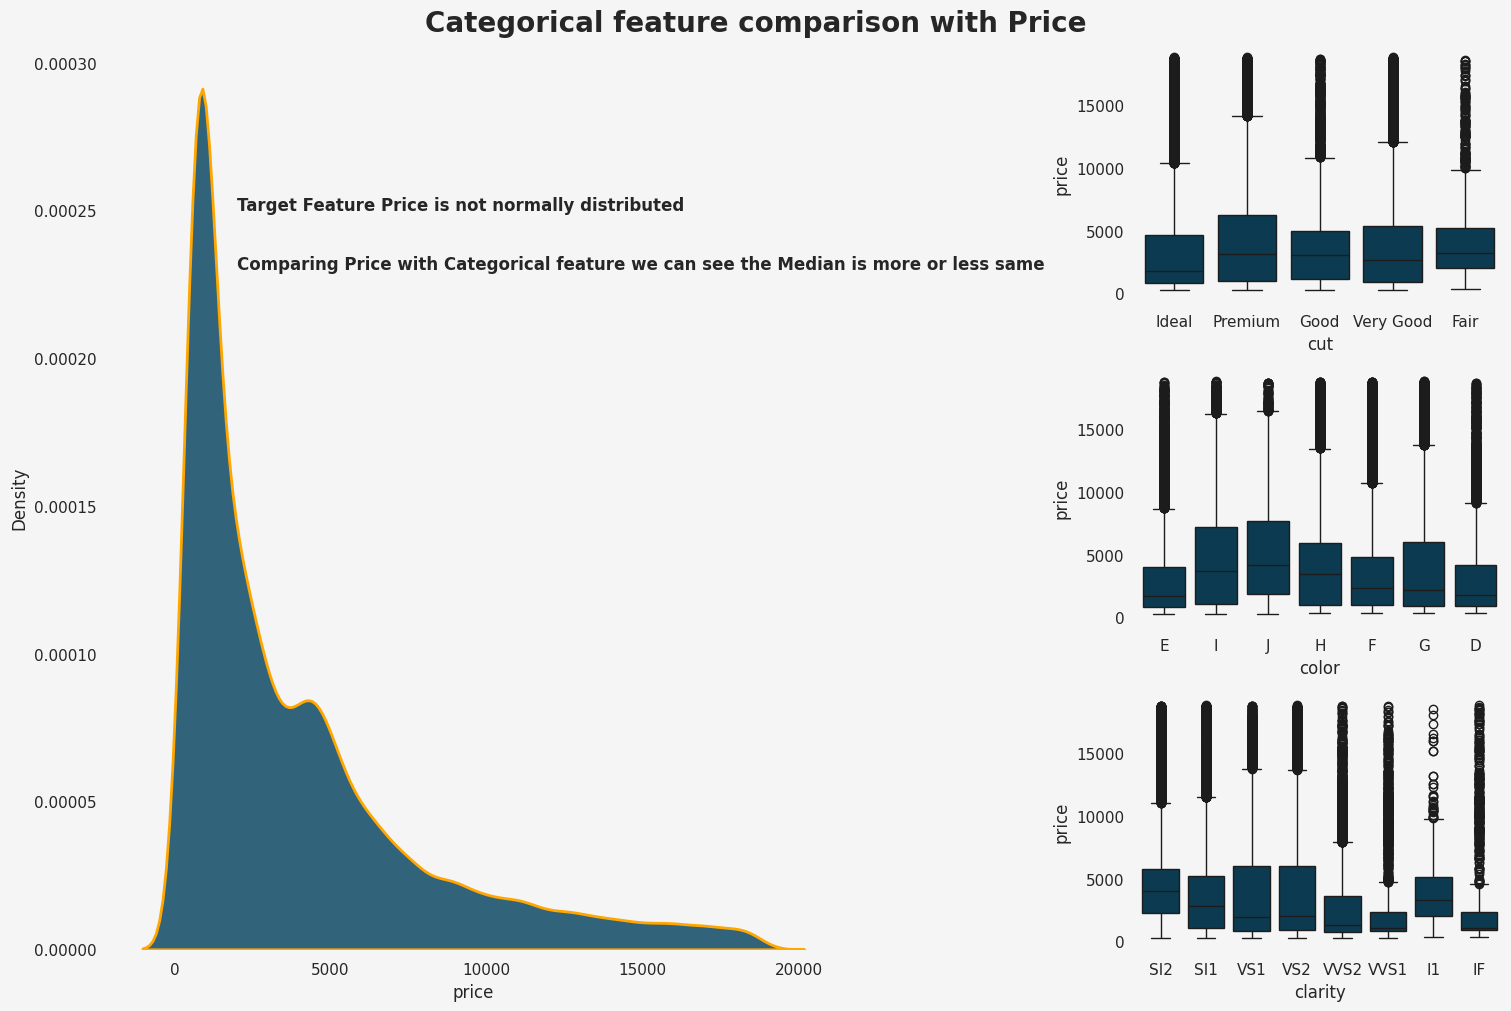

In [ ]:
fig=plt.figure(figsize=(15,10), constrained_layout=True)
# let us find the target variable relationship with Categorical variables
plt.suptitle("Categorical feature comparison with Price", family=(), size=20, weight='bold')
cat_cols = df.select_dtypes(include='object').columns.to_list()
ax=fig.subplot_mosaic("""
                        AAB
                        AAC
                        AAD
                        """)
sns.kdeplot(df['price'], fill=True, edgecolor=colors[-1], linewidth=2, color=colors[0], ax=ax['A'], alpha=0.8)
ax['A'].text(x=2000,y=0.00025, s="Target Feature Price is not normally distributed", family=(), fontweight='bold')
ax['A'].text(x=2000,y=0.00023, s="Comparing Price with Categorical feature we can see the Median is more or less same",family=(), fontweight='bold')
sns.boxplot(data=df, x=cat_cols[0],y='price', ax=ax['B'])
sns.boxplot(data=df, x=cat_cols[1],y='price', ax=ax['C'])
sns.boxplot(data=df, x=cat_cols[2],y='price', ax=ax['D'])
for i in 'ABCD':
    for s in ['left','right','top','bottom']:
        ax[i].spines[s].set_visible(False)

Price feature is not normally distribured



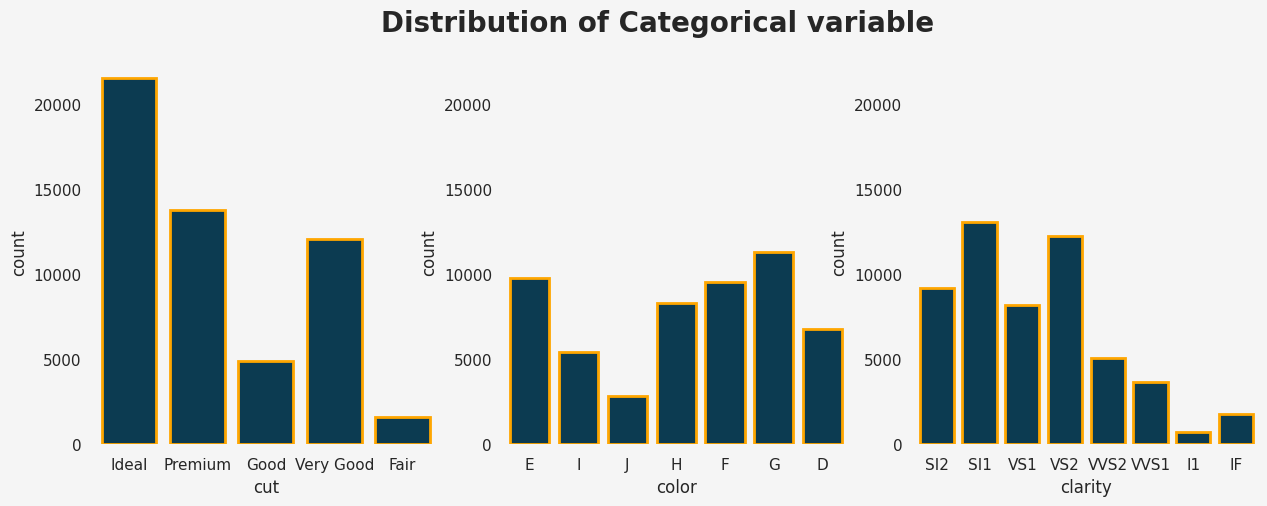

In [ ]:
cat_cols=df.select_dtypes(include='object').columns.to_list()

fig=plt.figure(figsize=(15,5))
plt.suptitle("Distribution of Categorical variable",family=(), size=20, weight='bold')
ax1=plt.subplot(131)
sns.countplot(data=df, x=cat_cols[0], ax=ax1, linewidth=2, edgecolor=colors[-1])
for s in ['left','right','top','bottom']:
        ax1.spines[s].set_visible(False)
ax2=plt.subplot(132, sharey=ax1)
sns.countplot(data=df, x=cat_cols[1], ax=ax2,linewidth=2, edgecolor=colors[-1])
for s in ['left','right','top','bottom']:
        ax2.spines[s].set_visible(False)
ax3=plt.subplot(133, sharey=ax1)
sns.countplot(data=df, x=cat_cols[2], ax=ax3,linewidth=2, edgecolor=colors[-1])
for s in ['left','right','top','bottom']:
        ax3.spines[s].set_visible(False)

In [ ]:
import statsmodels.api as stats
from statsmodels.stats.anova import anova_lm
from   statsmodels.formula.api import ols

Hypothesis Testing
comparing Price value with Categorical feature and check if the mean has significant difference

H0 = there is no significant difference

H1 = there are significant difference

In [ ]:
formula='price ~ C(clarity)'
model=ols(formula, df).fit()
print(np.round(anova_lm(model, typ=2),3))
print(model.summary())
if np.round(model.f_pvalue,2)<0.05:
    print("Reject Null Hypothesis and accept the alternate hypothesis")
else:
    print("Accept the Null Hypothesis")

                  sum_sq       df        F  PR(>F)
C(clarity)  2.327545e+10      7.0  214.954     0.0
Residual    8.339507e+11  53912.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     215.0
Date:                Wed, 15 May 2024   Prob (F-statistic):          2.41e-316
Time:                        14:46:08   Log-Likelihood:            -5.2281e+05
No. Observations:               53920   AIC:                         1.046e+06
Df Residuals:                   53912   BIC:                         1.046e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      

In [ ]:
formula='price ~ C(color)'
model=ols(formula, df).fit()
print(np.round(anova_lm(model, typ=2),3))
print(model.summary())
if np.round(model.f_pvalue,2)<0.05:
    print("Reject Null Hypothesis and accept the alternate hypothesis")
else:
    print("Accept the Null Hypothesis")

                sum_sq       df        F  PR(>F)
C(color)  2.678375e+10      6.0  289.804     0.0
Residual  8.304424e+11  53913.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     289.8
Date:                Wed, 15 May 2024   Prob (F-statistic):               0.00
Time:                        14:46:09   Log-Likelihood:            -5.2270e+05
No. Observations:               53920   AIC:                         1.045e+06
Df Residuals:                   53913   BIC:                         1.045e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      

In [ ]:
formula='price ~ C(cut)'
model=ols(formula, df).fit()
print(np.round(anova_lm(model, typ=2),3))
print(model.summary())
if np.round(model.f_pvalue,2)<0.05:
    print("Reject Null Hypothesis and accept the alternate hypothesis")
else:
    print("Accept the Null Hypothesis")

                sum_sq       df        F  PR(>F)
C(cut)    1.096482e+10      4.0  174.641     0.0
Residual  8.462613e+11  53915.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     174.6
Date:                Wed, 15 May 2024   Prob (F-statistic):          6.63e-149
Time:                        14:46:10   Log-Likelihood:            -5.2321e+05
No. Observations:               53920   AIC:                         1.046e+06
Df Residuals:                   53915   BIC:                         1.046e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|

In [ ]:
formula='price ~ C(cut)+C(color)+C(clarity)'
model=ols(formula, df).fit()
print(np.round(anova_lm(model, typ=2),3))
print(model.summary())
if np.round(model.f_pvalue,2)<0.05:
    print("Reject Null Hypothesis and accept the alternate hypothesis")
else:
    print("Accept the Null Hypothesis")

                  sum_sq       df        F  PR(>F)
C(cut)      5.526835e+09      4.0   93.000     0.0
C(color)    2.653957e+10      6.0  297.722     0.0
C(clarity)  1.998475e+10      7.0  192.162     0.0
Residual    8.008244e+11  53902.0      NaN     NaN
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     223.3
Date:                Wed, 15 May 2024   Prob (F-statistic):               0.00
Time:                        14:46:11   Log-Likelihood:            -5.2172e+05
No. Observations:               53920   AIC:                         1.043e+06
Df Residuals:                   53902   BIC:                         1.044e+06
Df Model:                          17                                         
Covariance Type:            nonrob

Conclusion on Hypothesis testing
Price value has significant (CI=95%) impact on the Cut, Clarity & Color of the Dimond

In [ ]:
df.shape

(53920, 10)

In [ ]:
# Dropping the outliers (since we have huge dataset) by defining appropriate measures across features depanding on the distribution and box plot readings
df = df[(df["carat"]<1.9)]
df = df[(df["depth"]<64)&(df["depth"]>60)]
df = df[(df["table"]<60)&(df["table"]>54)]
df = df[(df["price"]<80000)]
df = df[(df["x"]<9)]
df = df[(df["y"]<8)]
df = df[(df["z"]<6)]
df.shape

(36028, 10)

display the Box-Plot for numerical feature after the dropping the outliers values.

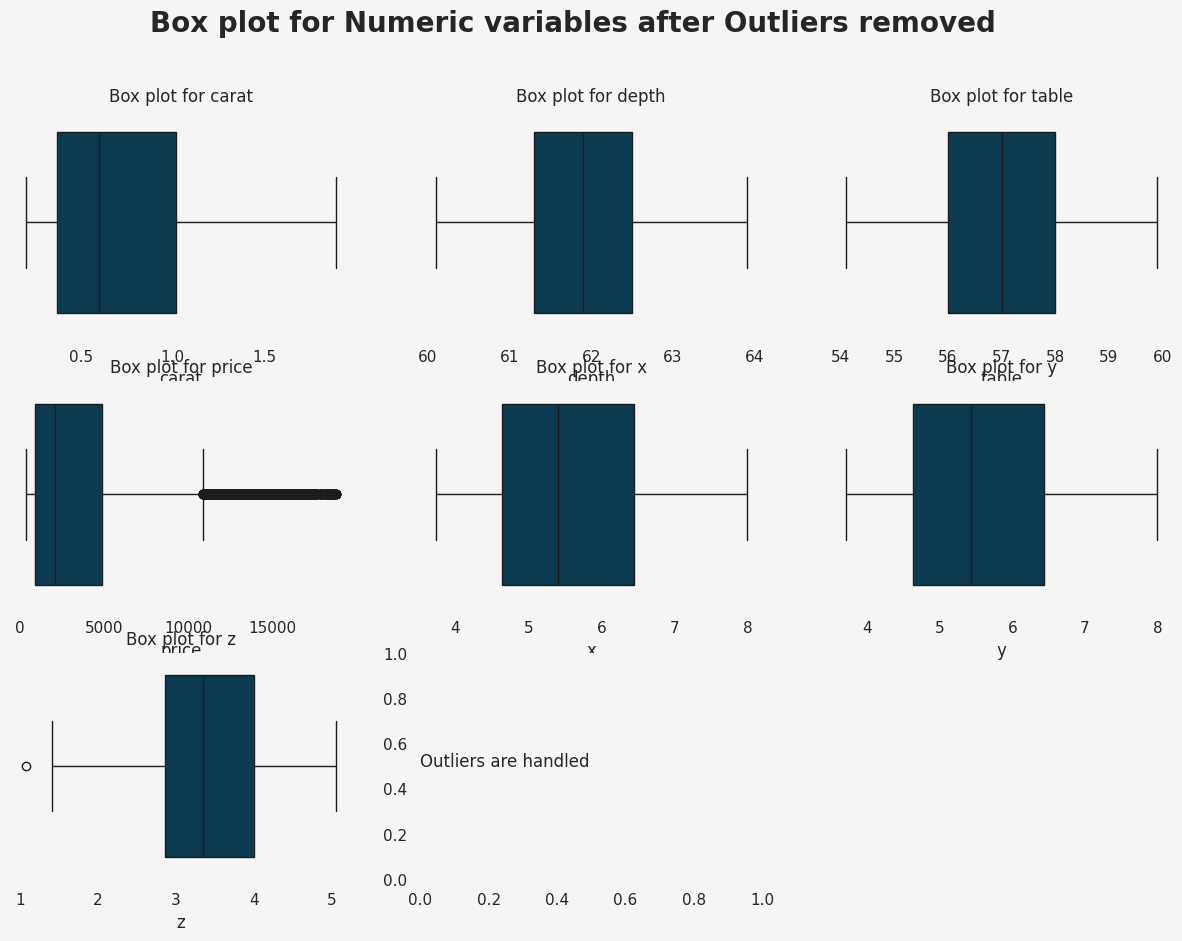

In [ ]:
j=0
fig=plt.figure(figsize=(15,10))
plt.suptitle("Box plot for Numeric variables after Outliers removed", family=(), size=20, weight='bold')
for i in int_cols:
    ax=plt.subplot(331+j)
    #ax.set_title('Title')
    #print(df[i])
    ax=sns.boxplot(data=df, x=i,color=colors[0])
    ax.set_title("Box plot for {}".format(i))
    for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)
    j=j+1
ax=plt.subplot(331+j)
ax.text(x=0,y=0.5, s='Outliers are handled')
for s in ['left','right','top','bottom']:
        ax.spines[s].set_visible(False)

after exploratory data analysis for both numerical and categorical features, only one feature can be dropped because it had no impact on the price prediction. this feature is (table) and removed with the function below.

In [ ]:
df.drop(['table'], axis = 1, inplace = True)

In [ ]:
df.shape

(36028, 9)

Label encoding of categorical features in the training set. Label encoding is converting categorical data into numerical data since the model cant understand textual data.

In [ ]:
# Making a copy to keep original data in its form intact
data1 = df.copy()

# Applying label encoder to columns with categorical data
columns = ['cut','color','clarity']
label_encoder = LabelEncoder()
for col in columns:
    data1[col] = label_encoder.fit_transform(data1[col])
data1.describe()

,carat,cut,color,clarity,depth,price,x,y,z
count,36028.000000,36028.000000,36028.000000,36028.000000,36028.000000,36028.000000,36028.000000,36028.000000,36028.000000
mean,0.722138,2.603558,2.523509,3.959032,61.936999,3421.235567,5.566672,5.573017,3.449910
std,0.390988,0.891303,1.662716,1.739778,0.852670,3360.636103,1.012829,1.008133,0.629309
min,0.200000,0.000000,0.000000,0.000000,60.100000,326.000000,3.730000,3.710000,1.070000
25%,0.370000,2.000000,1.000000,2.000000,61.300000,899.000000,4.630000,4.630000,2.860000
50%,0.600000,2.000000,3.000000,4.000000,61.900000,2076.500000,5.410000,5.430000,3.350000
75%,1.020000,3.000000,4.000000,5.000000,62.500000,4884.000000,6.440000,6.440000,4.000000
max,1.890000,4.000000,6.000000,7.000000,63.900000,18806.000000,7.990000,7.990000,5.060000


In [ ]:
data1.head()

,carat,cut,color,clarity,depth,price,x,y,z
0,0.23,2,1,3,61.5,326,3.95,3.98,2.43
3,0.29,3,5,5,62.4,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,335,4.34,4.35,2.75
5,0.24,4,6,7,62.8,336,3.94,3.96,2.48
6,0.24,4,5,6,62.3,336,3.95,3.98,2.47


<Axes: >

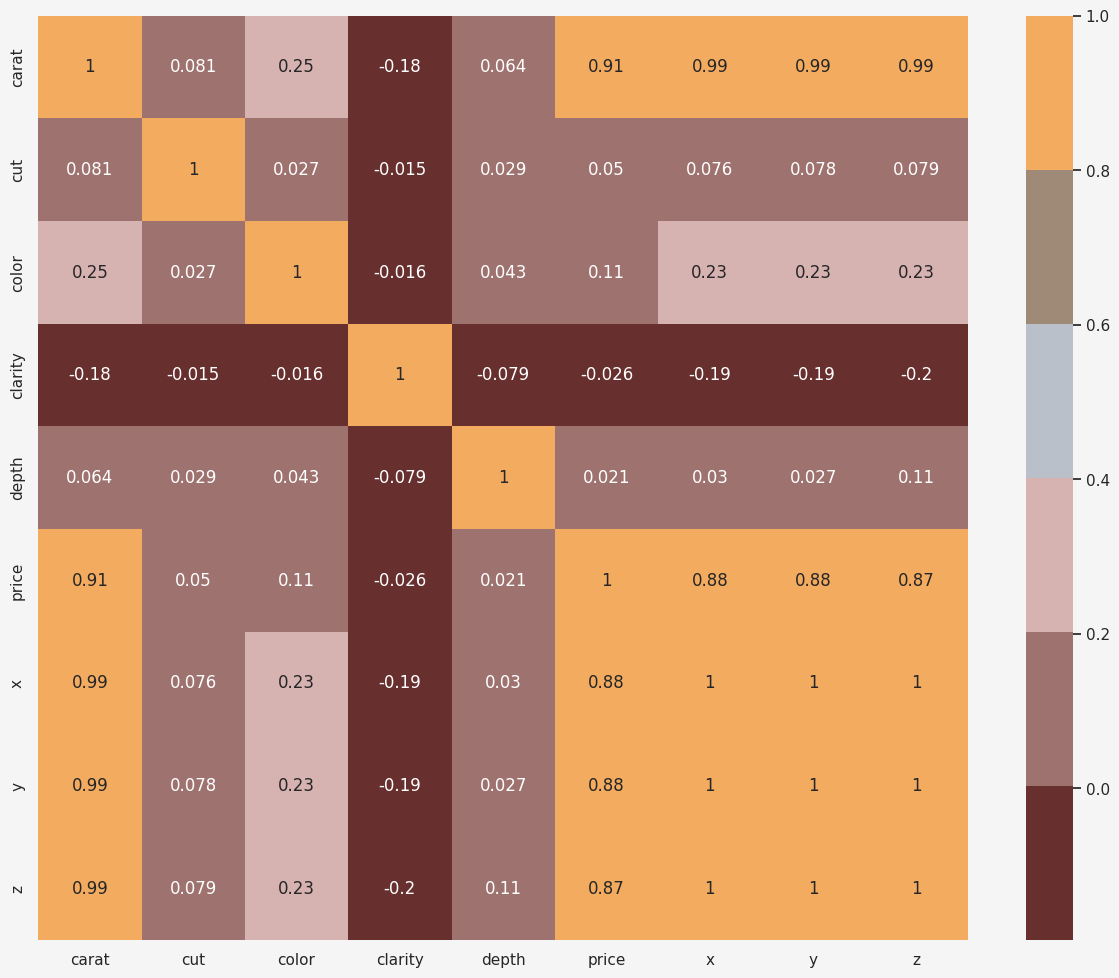

In [ ]:
# Examining correlation matrix using heatmap
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
cols = (["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
corrmat= data1.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,cmap=cols,annot=True)

Note: Features "carat", "x", "y", "z" are highly correlated to our target variable, price.
Features "cut", "clarity", "depth" are less correlated, but we will keep all the features becouse there are relationship.

Data Transfornation (normalization) ---- z-score used for scaling down the features between the range of -1 and 1. This helps the model make better prediction as it is easy to understand.

In [ ]:
# Calculate the z-score with scipy
import scipy.stats as stats
data1 = stats.zscore(data1)

In [ ]:
data1

,carat,cut,color,clarity,depth,price,x,y,z
0,-1.258721,-0.677173,-0.916291,-0.551246,-0.512514,-0.921039,-1.596216,-1.580187,-1.620707
3,-1.105261,0.444795,1.489446,0.598342,0.543009,-0.918659,-1.349379,-1.332201,-1.302893
4,-1.054108,-1.799141,2.090880,-0.551246,1.598531,-0.918361,-1.211151,-1.213167,-1.112205
5,-1.233144,1.566763,2.090880,1.747930,1.012130,-0.918064,-1.606090,-1.600026,-1.541253
6,-1.233144,1.566763,1.489446,1.173136,0.425729,-0.918064,-1.596216,-1.580187,-1.557144
...,...,...,...,...,...,...,...,...,...
53934,-0.005468,0.444795,-1.517725,-1.126040,0.894850,-0.197654,0.121767,0.155719,0.206721
53935,-0.005468,-0.677173,-1.517725,-1.126040,-1.333476,-0.197654,0.181008,0.185477,0.079596
53936,-0.005468,-1.799141,-1.517725,-1.126040,1.363971,-0.197654,0.121767,0.175558,0.254393
53938,0.352604,0.444795,0.888012,-0.551246,-1.098915,-0.197654,0.575947,0.542578,0.460972


# **Step4:** Model Building


Steps involved:

Setting up features and target

Build a pipeline of standard scalar and model for five different regressors

Fit all the models on training data

Get mean of cross-validation on the training set for all the models for negative root mean square error

Pick the model with the best cross-validation score

Fit the best model on the training set and get



Dividing the data for training and testing accordingly. X takes the all features while Y takes the target variable

We have 10 actual columns, 9 are predictor variables and 1 is the target variable

In [ ]:
X= data1.drop(["price"],axis =1)
y= data1["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=25)

In [ ]:
X.head()

,carat,cut,color,clarity,depth,x,y,z
0,-1.258721,-0.677173,-0.916291,-0.551246,-0.512514,-1.596216,-1.580187,-1.620707
3,-1.105261,0.444795,1.489446,0.598342,0.543009,-1.349379,-1.332201,-1.302893
4,-1.054108,-1.799141,2.090880,-0.551246,1.598531,-1.211151,-1.213167,-1.112205
5,-1.233144,1.566763,2.090880,1.747930,1.012130,-1.606090,-1.600026,-1.541253
6,-1.233144,1.566763,1.489446,1.173136,0.425729,-1.596216,-1.580187,-1.557144


In [ ]:
y.head()

0   -0.921039
3   -0.918659
4   -0.918361
5   -0.918064
6   -0.918064
Name: price, dtype: float64

In [ ]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr",LinearRegression())])

pipeline_lasso=Pipeline([("scalar2", StandardScaler()),
                      ("lasso",Lasso())])

pipeline_dt=Pipeline([("scalar3",StandardScaler()),
                     ("dt",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar4",StandardScaler()),
                     ("rf",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar5",StandardScaler()),
                     ("kn",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar6",StandardScaler()),
                     ("xgb",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest",4: "KNeighbors", 5: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [ ]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=12)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

LinearRegression: 0.345578 
Lasso: 0.994475 
DecisionTree: 0.173193 
RandomForest: 0.129949 
KNeighbors: 0.197045 
XGBRegressor: 0.127167 


In [ ]:
# Model prediction on test data with XGBRegressor which gave us the least RMSE
pred = pipeline_xgb.predict(X_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

R^2: 0.983601971726405
Adjusted R^2: 0.9835898250387949


# Based on the RMSE, it is concluded that the XGBRegressor is the best regression model for predicting the Diamonds price with 98.3% accuracy.

# **Step5:** Visualizing Prediction

Plot distribution graph between predicted price and real price

In [ ]:
y_final = pipeline_xgb.predict(data1.drop('price', axis=1))
comparison_df = pd.DataFrame({'Actual Price': df.price, 'Predicted Price': y_final})

fig = px.scatter(comparison_df, x='Actual Price', y='Predicted Price', color='Actual Price')
fig.update_layout(
    title='Comparison of Actual Price vs. Predicted Price',
    xaxis_title='Actual Price',
    yaxis_title='Predicted Price'
)
fig.show()

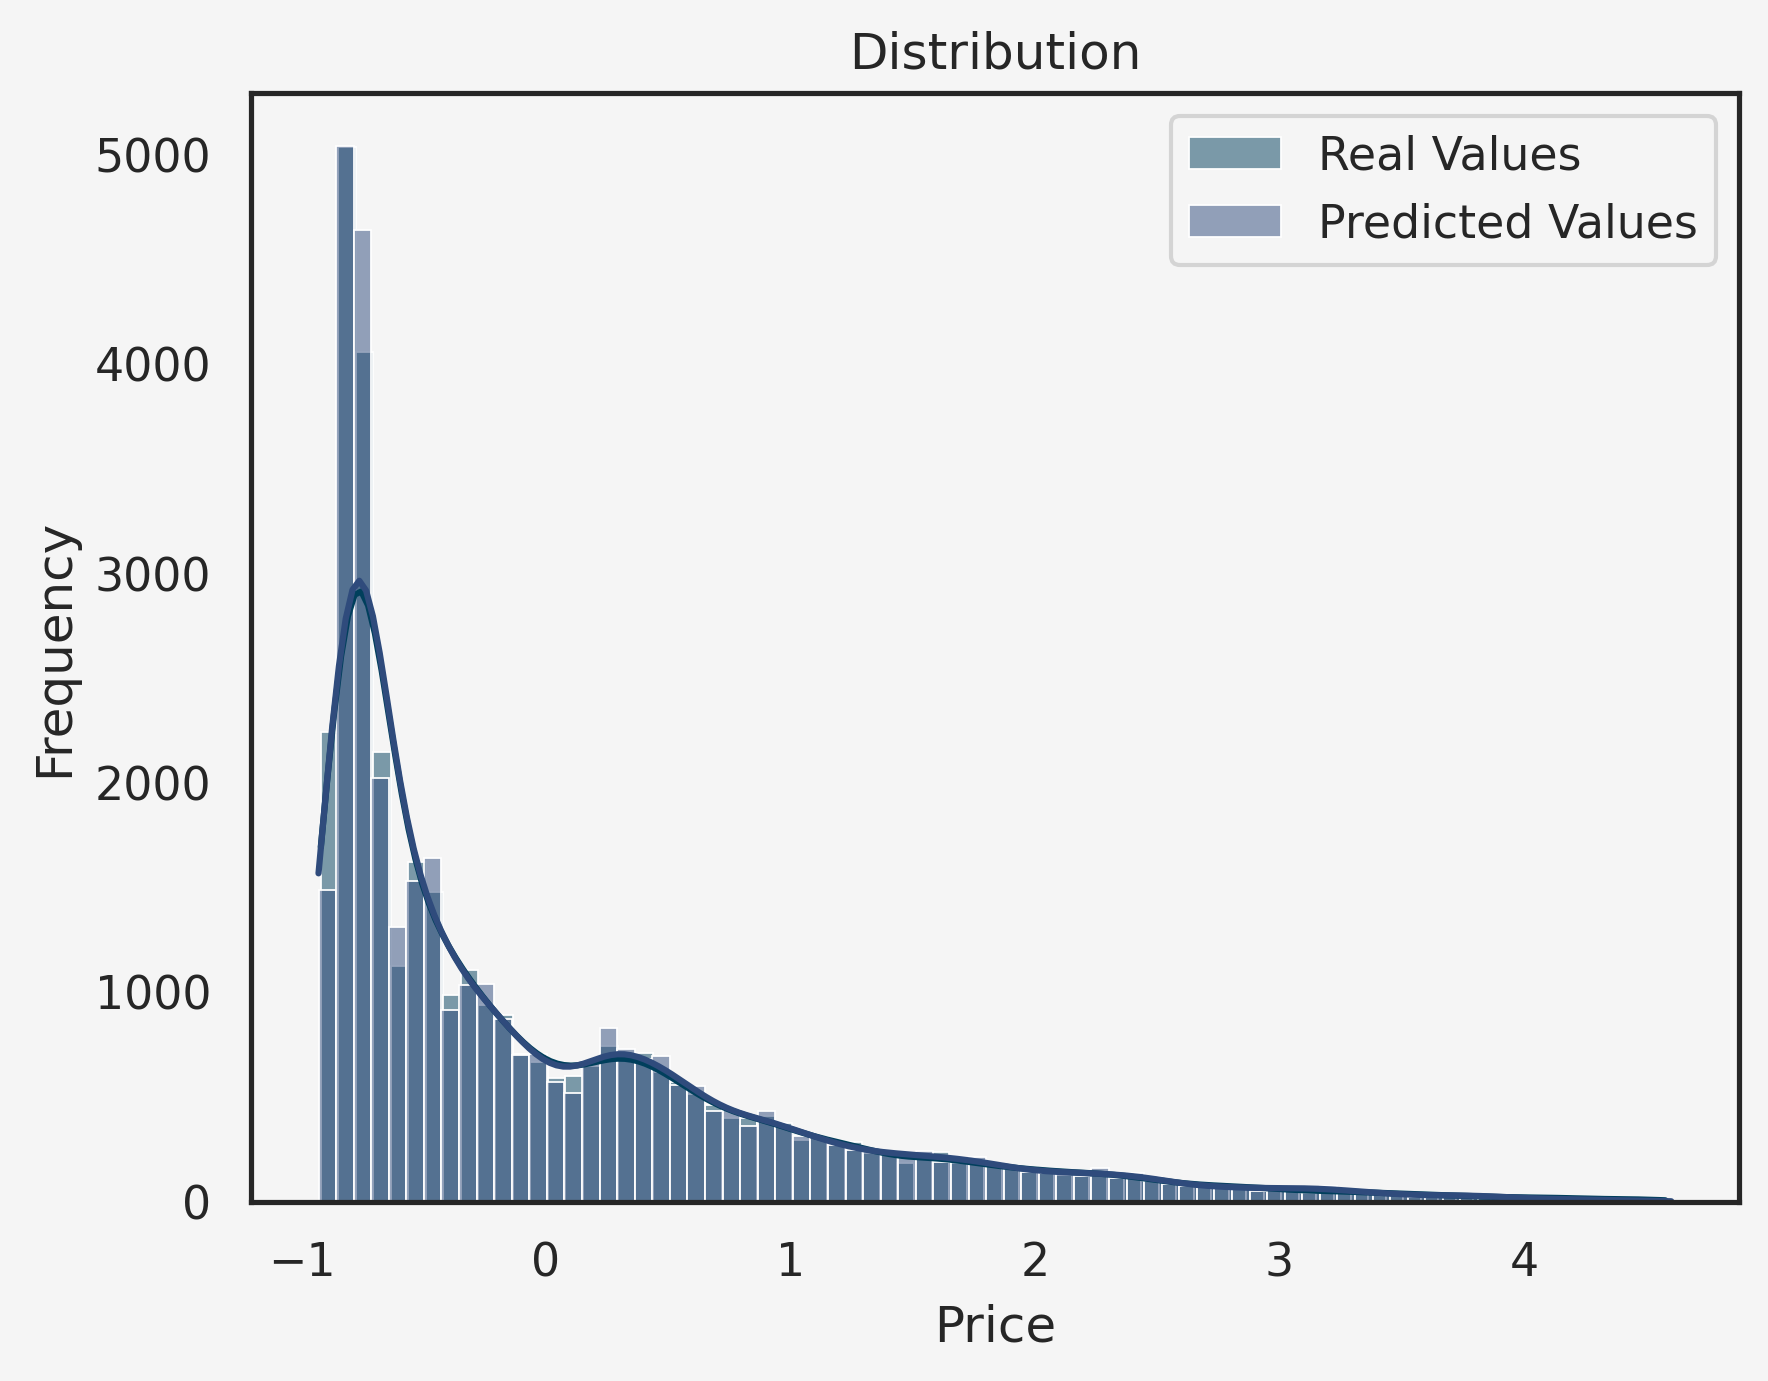

In [ ]:
plt.figure(dpi=300)
sns.histplot(data1.price, kde=True, label='Real Values')
sns.histplot(y_final, kde=True, label='Predicted Values')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution')
plt.legend()
plt.show();